In [1]:
#data augmentation using four versions of GANs with SVM for 500 iterations
#use 75% original data from R software as inputs for GANs
#GANs
import pandas as pd
train18 = pd.read_csv('train21.csv',index_col=0)
train18.head()

,V3.1,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,solubility
1,0.108935,0.187246,0.093064,0.089552,0.290216,0.075560,0.000000,0.125800,0.112514,0.402985,...,0.000000,0.114921,1.000000,0.413840,0.375768,0.100498,0.388060,0.429324,0.623549,0.34
2,0.215989,0.296624,0.112738,0.250348,0.054087,0.316846,0.189056,0.322372,0.167754,0.292907,...,0.245380,0.287249,0.335466,0.316222,0.288882,0.206027,0.144645,0.293381,0.443054,0.07
3,0.174163,0.357420,0.213172,0.205128,0.249288,0.367788,0.150604,0.378205,0.289941,0.230769,...,0.079365,0.309458,0.314957,0.355478,0.457265,0.086325,0.388889,0.286828,0.267806,0.08
4,0.468719,0.220601,0.171614,0.288991,0.066896,0.301892,0.300221,0.415629,0.328511,0.148624,...,0.074541,0.265309,0.307339,0.178065,0.332029,0.200765,0.178899,0.153940,0.443170,0.31
5,0.399871,0.165186,0.311117,0.249480,0.181913,0.315748,0.272134,0.324176,0.250760,0.246985,...,0.144788,0.153153,0.292516,0.242109,0.327137,0.265974,0.216216,0.239208,0.314853,0.49


data_dim:  21
data_cols:  ['V3.1', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'class']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 21)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               2816      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 512)               131584    


/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


_________________________________________________________________
dense_12 (Dense)             (None, 21)                10773     
Total params: 178,197
Trainable params: 178,197
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 21)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               11264     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       

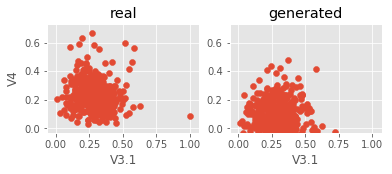

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6036, 0.8746, 0.5812, 0.9553
D Real - D Gen: -0.2934


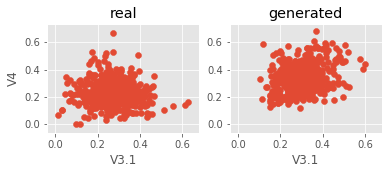

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6222, 0.8396, 0.6019, 0.9756
D Real - D Gen: -0.2377


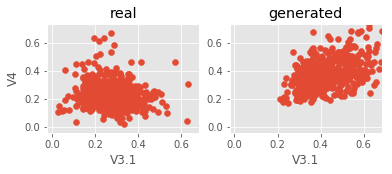

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: 0.7460, 0.6970, 0.6861, 0.9878
D Real - D Gen: -0.0110


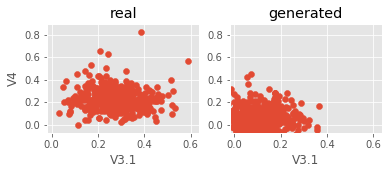

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: 0.7141, 0.7288, 0.6968, 0.9756
D Real - D Gen: -0.0319


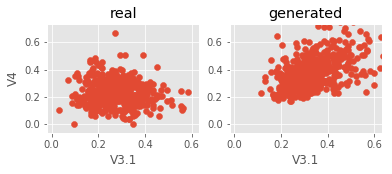

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: 0.9186, 0.5723, 0.7853, 0.9797
D Real - D Gen: 0.2130


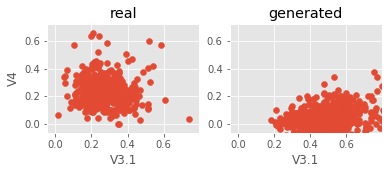

In [3]:
import xgboost
import pickle
import pandas as pd
import numpy as np
train = train18
train.rename(columns={'solubility': 'class'}, inplace=True)
data = train
#label_cols = ['class']
#data_cols = list(data.columns[ data.columns != 'class' ])
data_cols = list(data.columns)

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

rand_dim = 21 # 21 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = '/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN files'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

train_no_label = train[ data_cols ]

# Training the vanilla GAN and CGAN architectures

k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN

data_dim:  20
data_cols:  ['V3.1', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22']
label_dim:  1
label_cols:  ['class']
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 21)           0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 22)           0           input_5[0][0]                    
                                                                 input_6[0][0]                    
_________

/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


__________________________________________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 21)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               11264     
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 351,234
Trainable params: 175,617
Non-trainable params: 175,617
_________________________________________________________________
None
_____________________

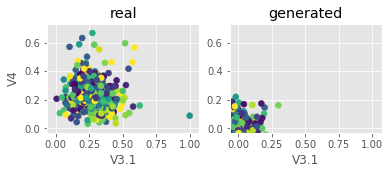

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6957, 0.7725, 0.6514, 0.9837
D Real - D Gen: -0.1211


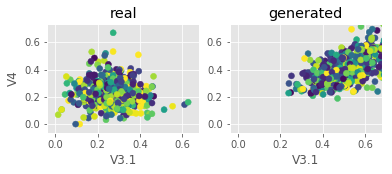

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: 0.7254, 0.7096, 0.6950, 0.9451
D Real - D Gen: -0.0146


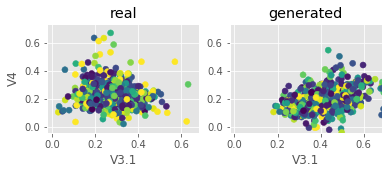

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: 0.8000, 0.6600, 0.6227, 0.9797
D Real - D Gen: -0.0373


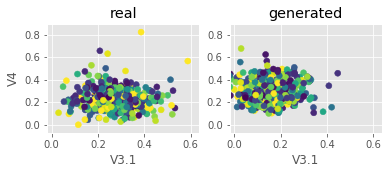

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: 0.7626, 0.7057, 0.7212, 0.9898
D Real - D Gen: 0.0155


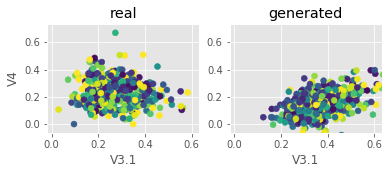

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6467, 0.8371, 0.6773, 0.9919
D Real - D Gen: -0.1598


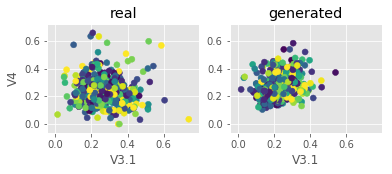

In [5]:
#CGAN
label_cols = ['class']
data_cols = list(data.columns[ data.columns != 'class' ])
adversarial_training_GAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # CGAN


data_dim:  21
data_cols:  ['V3.1', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'class']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 21)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               2816      
_________________________________________________________________
dense_34 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_35 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_36 (Dense)             (None, 21)                10773     
Total params: 178,197
Trainable params: 178,197
Non-trainable params: 0
_______________________________

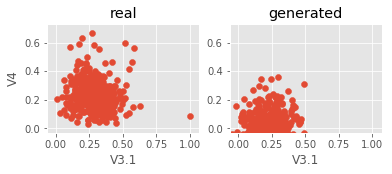

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: -0.0698, 0.0683, 0.0805, 0.8232
D Real - D Gen: 0.0121


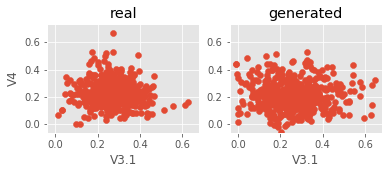

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: -0.0758, 0.0667, 0.0798, 0.8272
D Real - D Gen: 0.0131


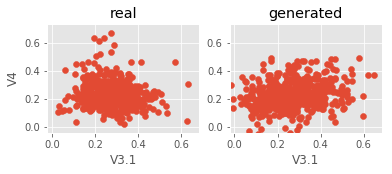

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: -0.1280, 0.1255, 0.1380, 0.8069
D Real - D Gen: 0.0124


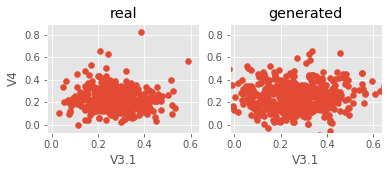

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: -0.1416, 0.1409, 0.1519, 0.8028
D Real - D Gen: 0.0111


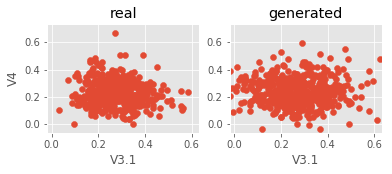

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: -0.1423, 0.1416, 0.1538, 0.8272
D Real - D Gen: 0.0122


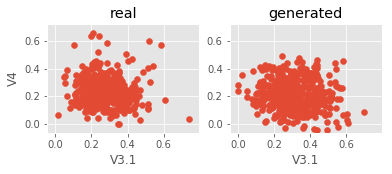

In [7]:
#WGAN
data = train
##label_cols = ['class']
##data_cols = list(data.columns[ data.columns != 'class' ])
data_cols = list(data.columns)

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

rand_dim = 21 # 21 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = '/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN files'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

train_no_label = train[ data_cols ]

# Training WGAN

k_d = 5 # train critic to optimal state each time
learning_rate = 1e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_WGAN(arguments, train_no_label, data_cols=data_cols ) # WGAN


data_dim:  20
data_cols:  ['V3.1', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22']
label_dim:  1
label_cols:  ['class']
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 21)           0                                            
__________________________________________________________________________________________________
input_13 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 22)           0           input_12[0][0]                   
                                                                 input_13[0][0]                   
_________

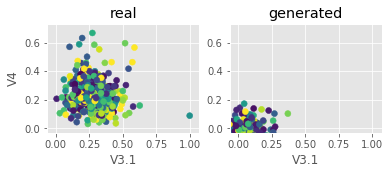

Step: 100 of 501.
Losses: G, D Gen, D Real, Xgb: -0.0594, 0.0587, 0.0684, 0.8252
D Real - D Gen: 0.0097


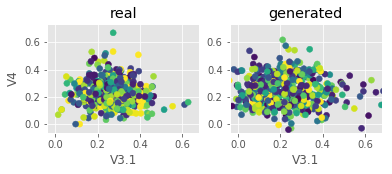

Step: 200 of 501.
Losses: G, D Gen, D Real, Xgb: -0.1140, 0.1034, 0.1161, 0.7866
D Real - D Gen: 0.0127


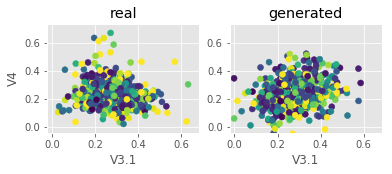

Step: 300 of 501.
Losses: G, D Gen, D Real, Xgb: -0.1132, 0.1115, 0.1250, 0.7886
D Real - D Gen: 0.0135


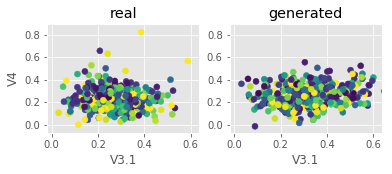

Step: 400 of 501.
Losses: G, D Gen, D Real, Xgb: -0.1172, 0.1127, 0.1241, 0.8049
D Real - D Gen: 0.0114


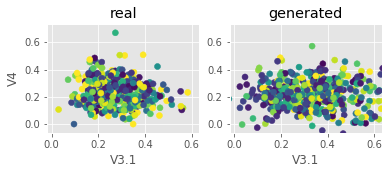

Step: 500 of 501.
Losses: G, D Gen, D Real, Xgb: -0.1013, 0.0983, 0.1072, 0.7724
D Real - D Gen: 0.0089


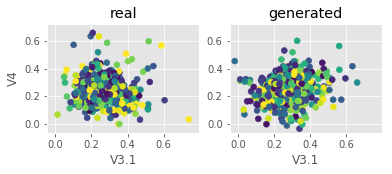

In [8]:
#WCGAN
label_cols = ['class']
data_cols = list(data.columns[ data.columns != 'class' ])

arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_WGAN(arguments, train, data_cols=data_cols, label_cols=label_cols ) # WCGAN

In [9]:
#save data including original data and generated data each 100 iterations
#GANs
train=train18
seed = 17
data_dim = 21
np.random.seed(seed)
generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
for i in range(1, 6):
    generator_model.load_weights('/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN filesGAN_generator_model_weights_step_'+str(i)+'00.h5')
    test_size = 2364
    x = get_data_batch(train, test_size, seed=0)
    z = np.random.normal(size=(test_size, rand_dim))

    g_z = generator_model.predict(z)

    GAN_0320 = pd.DataFrame(data=g_z)
    train1=train.as_matrix(columns=None)
    train2=GAN_0320.as_matrix(columns=None)
    answer=np.vstack((train1,train2))
    result=pd.DataFrame(data=answer)
    result.to_csv('GAN_'+str(i)+'00_0408.csv') 

In [10]:
#CGAN
train=train18     
seed = 17
data_dim = 20
label_dim = 1
if label_dim > 0: with_class = True
np.random.seed(seed)
generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count)
for i in range(1, 6):
    generator_model.load_weights('/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN filesCGAN_generator_model_weights_step_'+str(i)+'00.h5')
    test_size = 2364
    x = get_data_batch(train, test_size, seed=0)
    z = np.random.normal(size=(test_size, rand_dim))
    if with_class:
        labels = x[:,-label_dim:]
        g_z = generator_model.predict([z, labels])
    else:
        g_z = generator_model.predict(z)
    GAN_0320 = pd.DataFrame(data=g_z)
    train1=train.as_matrix(columns=None)
    train2=GAN_0320.as_matrix(columns=None)
    answer=np.vstack((train1,train2))
    result=pd.DataFrame(data=answer)
    result.to_csv('CGAN_'+str(i)+'00_0408.csv') 

In [11]:
#WGAN
train=train18
seed = 17
data_dim = 21
np.random.seed(seed)
generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count, type='Wasserstein')
for i in range(1, 6):
    generator_model.load_weights('/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN filesWGAN_generator_model_weights_step_'+str(i)+'00.h5')
    test_size = 2364
    x = get_data_batch(train, test_size, seed=0)
    z = np.random.normal(size=(test_size, rand_dim))
    g_z = generator_model.predict(z)
    GAN_0320 = pd.DataFrame(data=g_z)
    train1=train.as_matrix(columns=None)
    train2=GAN_0320.as_matrix(columns=None)
    answer=np.vstack((train1,train2))
    result=pd.DataFrame(data=answer)
    result.to_csv('WGAN_'+str(i)+'00_0408.csv') 

In [12]:
#WCGAN
train=train18
seed = 17
data_dim = 20
label_dim = 1
if label_dim > 0: with_class = True
np.random.seed(seed)
generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')

for i in range(1, 6):
    generator_model.load_weights('/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN filesWCGAN_generator_model_weights_step_'+str(i)+'00.h5')
    test_size = 2364
    x = get_data_batch(train, test_size, seed=0)
    z = np.random.normal(size=(test_size, rand_dim))
    if with_class:
        labels = x[:,-label_dim:]
        g_z = generator_model.predict([z, labels])
    else:
        g_z = generator_model.predict(z)
    GAN_0320 = pd.DataFrame(data=g_z)
    train1=train.as_matrix(columns=None)
    train2=GAN_0320.as_matrix(columns=None)
    answer=np.vstack((train1,train2))
    result=pd.DataFrame(data=answer)
    result.to_csv('WCGAN_'+str(i)+'00_0408.csv') 

Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


data_dim:  21
data_cols:  ['V3.1', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'class']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 21)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2816      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_4 (Dense)              (None, 21)                10773     
Total params: 178,197
Trainable params: 178,197
Non-trainable params: 0
_______________________________

/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


_________________________________________________________________
generator (Model)            (None, 21)                178197    
_________________________________________________________________
discriminator (Model)        (None, 1)                 175617    
Total params: 353,814
Trainable params: 178,197
Non-trainable params: 175,617
_________________________________________________________________
None
Step: 0 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6711, 0.7344, 0.6600, 1.0000
D Real - D Gen: -0.0744


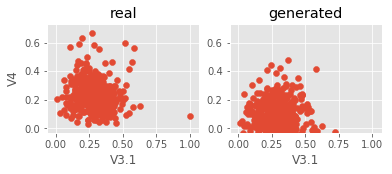

Step: 100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6232, 0.8518, 0.6192, 0.9675
D Real - D Gen: -0.2327


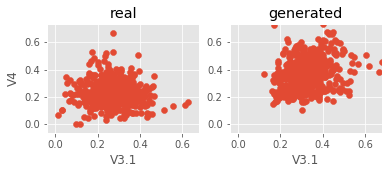

Step: 200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7482, 0.7267, 0.7226, 0.9898
D Real - D Gen: -0.0041


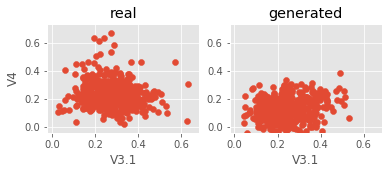

Step: 300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6898, 0.7817, 0.6552, 0.9898
D Real - D Gen: -0.1265


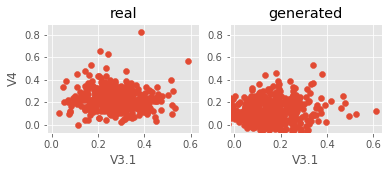

Step: 400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7142, 0.7535, 0.5983, 0.9776
D Real - D Gen: -0.1552


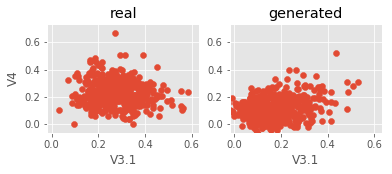

Step: 500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8107, 0.6395, 0.7072, 0.9919
D Real - D Gen: 0.0677


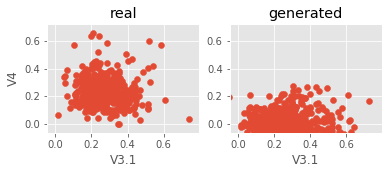

Step: 600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8096, 0.6337, 0.7130, 0.9675
D Real - D Gen: 0.0793


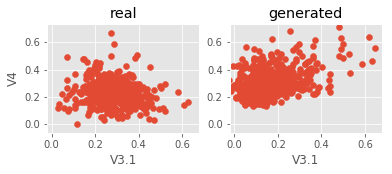

Step: 700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7662, 0.6977, 0.7585, 0.9695
D Real - D Gen: 0.0608


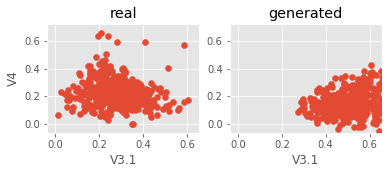

Step: 800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6922, 0.7966, 0.6847, 0.9817
D Real - D Gen: -0.1119


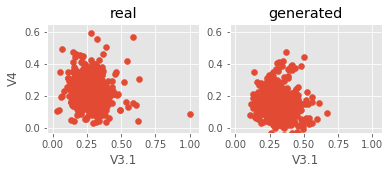

Step: 900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8501, 0.6087, 0.7672, 0.9858
D Real - D Gen: 0.1585


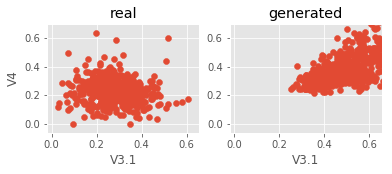

Step: 1000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8285, 0.6623, 0.7695, 0.9654
D Real - D Gen: 0.1072


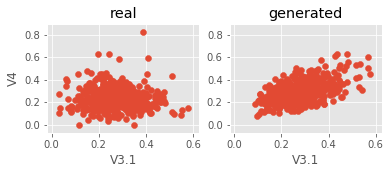

Step: 1100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7998, 0.6727, 0.6584, 0.9675
D Real - D Gen: -0.0144


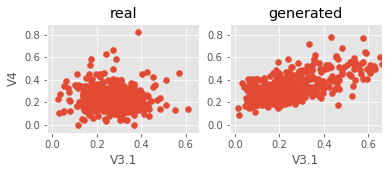

Step: 1200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7102, 0.7424, 0.7144, 0.9614
D Real - D Gen: -0.0280


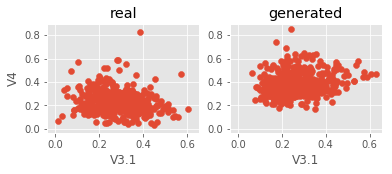

Step: 1300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.9898, 0.5849, 0.9356, 0.9736
D Real - D Gen: 0.3508


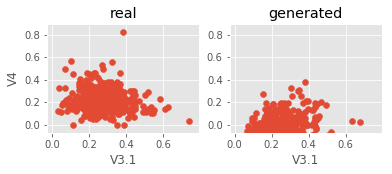

Step: 1400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7197, 0.7477, 0.6259, 0.9776
D Real - D Gen: -0.1218


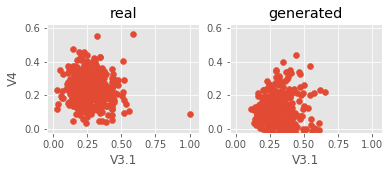

Step: 1500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7969, 0.6705, 0.7231, 0.9553
D Real - D Gen: 0.0526


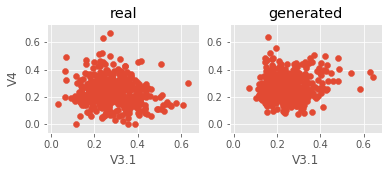

Step: 1600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7467, 0.7120, 0.7163, 0.9654
D Real - D Gen: 0.0044


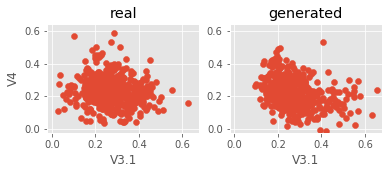

Step: 1700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8210, 0.6381, 0.7386, 0.9756
D Real - D Gen: 0.1005


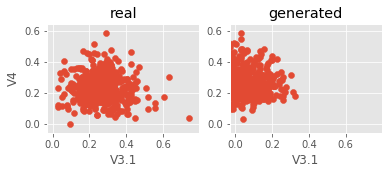

Step: 1800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8409, 0.6636, 0.6793, 0.9695
D Real - D Gen: 0.0157


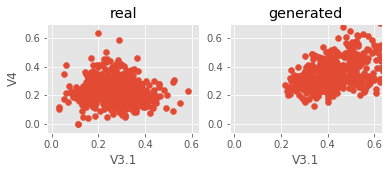

Step: 1900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7417, 0.7426, 0.7778, 0.9756
D Real - D Gen: 0.0351


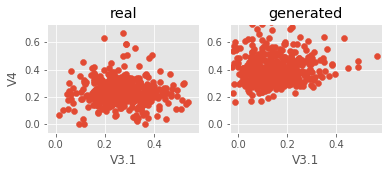

Step: 2000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7973, 0.6690, 0.6870, 0.9654
D Real - D Gen: 0.0180


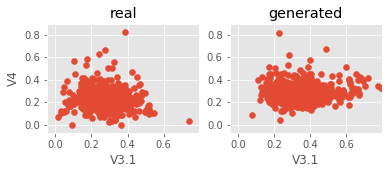

Step: 2100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7260, 0.7241, 0.6440, 0.9634
D Real - D Gen: -0.0801


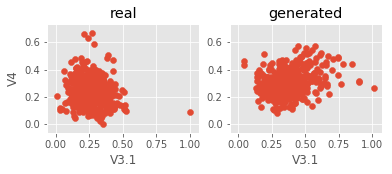

Step: 2200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7323, 0.7313, 0.7759, 0.9614
D Real - D Gen: 0.0446


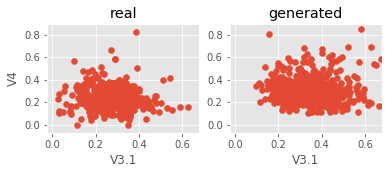

Step: 2300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7996, 0.6605, 0.7039, 0.9797
D Real - D Gen: 0.0434


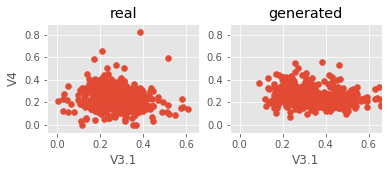

Step: 2400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7375, 0.6957, 0.7268, 0.9878
D Real - D Gen: 0.0310


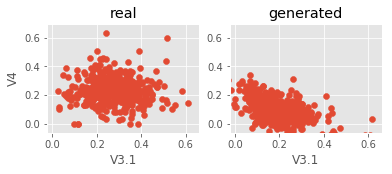

Step: 2500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7844, 0.6806, 0.7402, 0.9736
D Real - D Gen: 0.0596


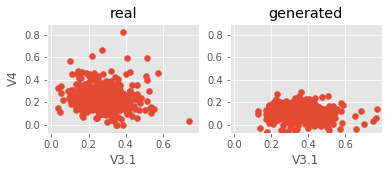

Step: 2600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6937, 0.7659, 0.6797, 0.9533
D Real - D Gen: -0.0863


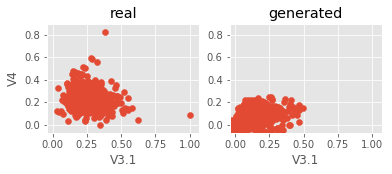

Step: 2700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8748, 0.6826, 0.6027, 0.9837
D Real - D Gen: -0.0798


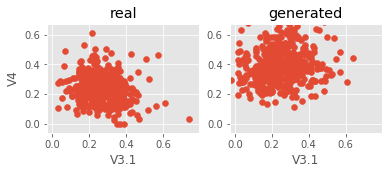

Step: 2800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8027, 0.6599, 0.7047, 0.9858
D Real - D Gen: 0.0448


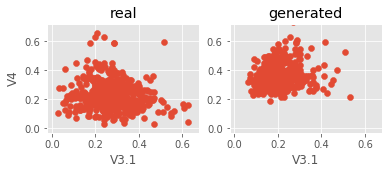

Step: 2900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7482, 0.6998, 0.7487, 0.9837
D Real - D Gen: 0.0489


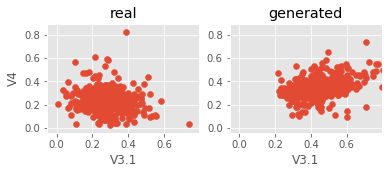

Step: 3000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8015, 0.7105, 0.7709, 0.9736
D Real - D Gen: 0.0604


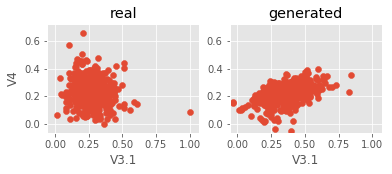

Step: 3100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7430, 0.7466, 0.6708, 0.9675
D Real - D Gen: -0.0758


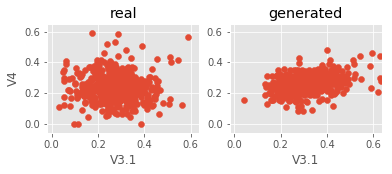

Step: 3200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8071, 0.6404, 0.7418, 0.9553
D Real - D Gen: 0.1015


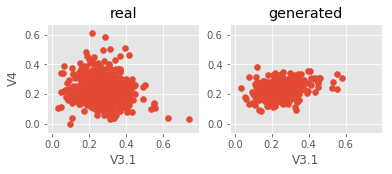

Step: 3300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7809, 0.6877, 0.6840, 0.9695
D Real - D Gen: -0.0038


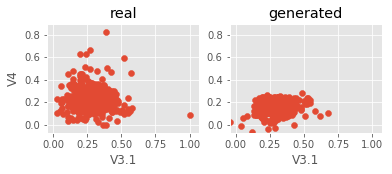

Step: 3400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7761, 0.7117, 0.6901, 0.9654
D Real - D Gen: -0.0215


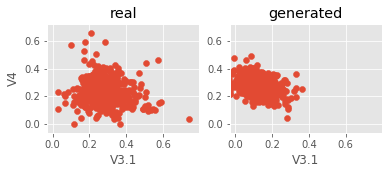

Step: 3500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8677, 0.6186, 0.7683, 0.9715
D Real - D Gen: 0.1496


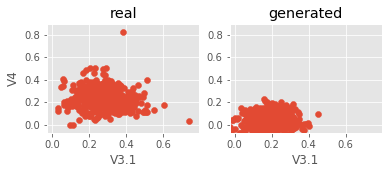

Step: 3600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7457, 0.7099, 0.6792, 0.9675
D Real - D Gen: -0.0307


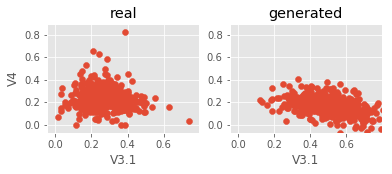

Step: 3700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7262, 0.7222, 0.6941, 0.9126
D Real - D Gen: -0.0281


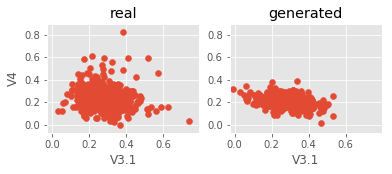

Step: 3800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7157, 0.7385, 0.6763, 0.9472
D Real - D Gen: -0.0622


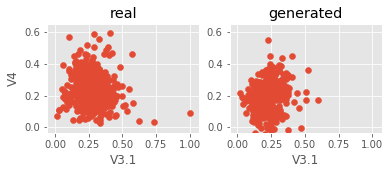

Step: 3900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7209, 0.7195, 0.6876, 0.9817
D Real - D Gen: -0.0319


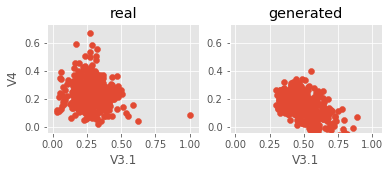

Step: 4000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7761, 0.6786, 0.7565, 0.9431
D Real - D Gen: 0.0778


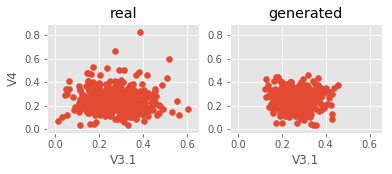

Step: 4100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7141, 0.7119, 0.7132, 0.9085
D Real - D Gen: 0.0013


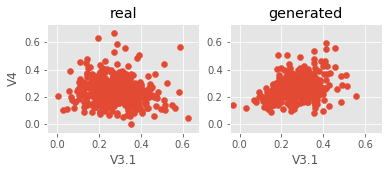

Step: 4200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8053, 0.6402, 0.7258, 0.9533
D Real - D Gen: 0.0856


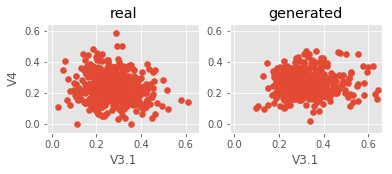

Step: 4300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7518, 0.6884, 0.7315, 0.9289
D Real - D Gen: 0.0431


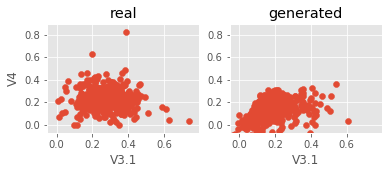

Step: 4400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7363, 0.7114, 0.6990, 0.8984
D Real - D Gen: -0.0124


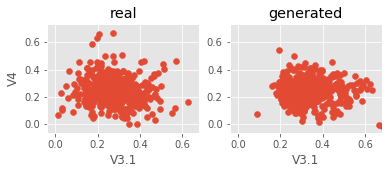

Step: 4500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7033, 0.7590, 0.5984, 0.9431
D Real - D Gen: -0.1606


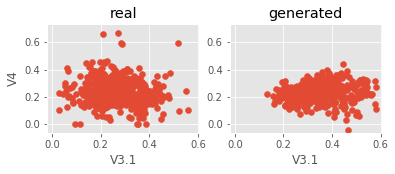

Step: 4600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7359, 0.7125, 0.7144, 0.9492
D Real - D Gen: 0.0020


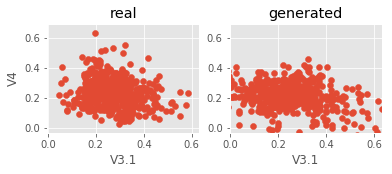

Step: 4700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6771, 0.7630, 0.6829, 0.9187
D Real - D Gen: -0.0800


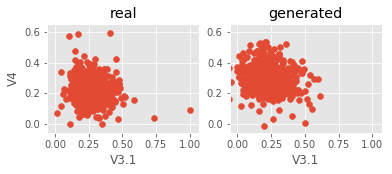

Step: 4800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7426, 0.6797, 0.7129, 0.9553
D Real - D Gen: 0.0332


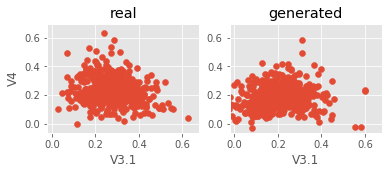

Step: 4900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8285, 0.6407, 0.7123, 0.9390
D Real - D Gen: 0.0716


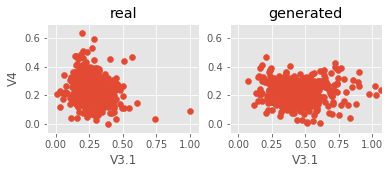

Step: 5000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7412, 0.7396, 0.6319, 0.8679
D Real - D Gen: -0.1078


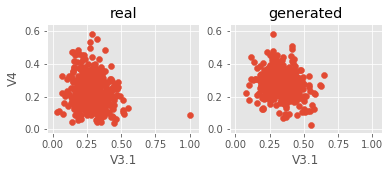

In [2]:
#increase GANs iterations from 500 to 5000
#training dataset 1
import xgboost
import pickle
import pandas as pd
import numpy as np
train18 = pd.read_csv('train21.csv',index_col=0)
train = train18
train.rename(columns={'solubility': 'class'}, inplace=True)
data = train
#label_cols = ['class']
#data_cols = list(data.columns[ data.columns != 'class' ])
data_cols = list(data.columns)

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

rand_dim = 21 # 21 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 5000 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = '/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN files'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

show = True


train_no_label = train[ data_cols ]

# Training the vanilla GAN and CGAN architectures

k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN

In [3]:
#save results each 100 iterations
train=train18
seed = 17
data_dim = 21
np.random.seed(seed)
generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
for i in range(1, 51):
    generator_model.load_weights('/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN filesGAN_generator_model_weights_step_'+str(i)+'00.h5')
    test_size = 2364
    x = get_data_batch(train, test_size, seed=0)
    z = np.random.normal(size=(test_size, rand_dim))

    g_z = generator_model.predict(z)

    GAN_0320 = pd.DataFrame(data=g_z)
    train1=train.as_matrix(columns=None)
    train2=GAN_0320.as_matrix(columns=None)
    answer=np.vstack((train1,train2))
    result=pd.DataFrame(data=answer)
    result.to_csv('GAN_'+str(i)+'00_0408.csv') 

data_dim:  21
data_cols:  ['V3.1', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'class']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 21)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               2816      
_________________________________________________________________
dense_18 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_19 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_20 (Dense)             (None, 21)                10773     
Total params: 178,197
Trainable params: 178,197
Non-trainable params: 0
_______________________________

/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'



input_5 (InputLayer)         (None, 21)                0         
_________________________________________________________________
generator (Model)            (None, 21)                178197    
_________________________________________________________________
discriminator (Model)        (None, 1)                 175617    
Total params: 353,814
Trainable params: 178,197
Non-trainable params: 175,617
_________________________________________________________________
None
Step: 0 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6711, 0.7345, 0.6597, 1.0000
D Real - D Gen: -0.0749


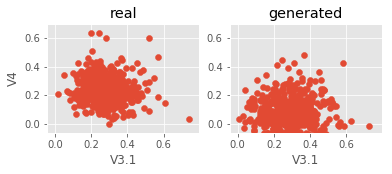

Step: 100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6743, 0.7883, 0.6509, 0.9898
D Real - D Gen: -0.1373


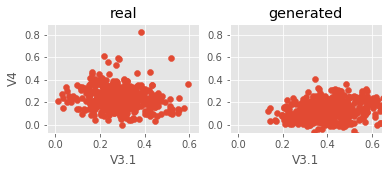

Step: 200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8028, 0.6680, 0.6737, 0.9939
D Real - D Gen: 0.0057


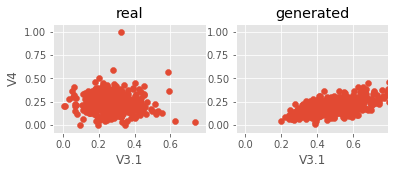

Step: 300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6492, 0.8056, 0.6154, 0.9736
D Real - D Gen: -0.1902


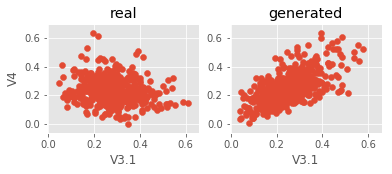

Step: 400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7329, 0.7081, 0.6689, 0.9634
D Real - D Gen: -0.0392


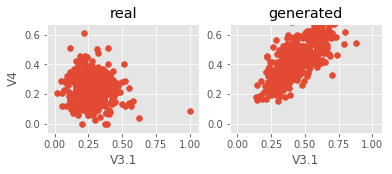

Step: 500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7486, 0.6917, 0.6866, 0.9675
D Real - D Gen: -0.0051


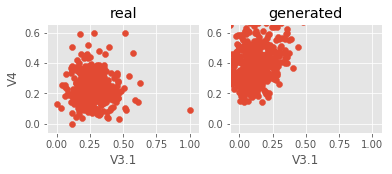

Step: 600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7691, 0.7033, 0.7393, 0.9878
D Real - D Gen: 0.0360


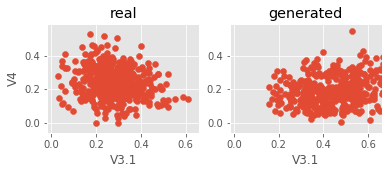

Step: 700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7321, 0.7466, 0.6148, 0.9837
D Real - D Gen: -0.1318


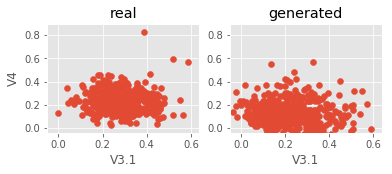

Step: 800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8630, 0.6226, 0.7352, 0.9715
D Real - D Gen: 0.1126


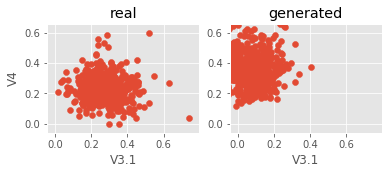

Step: 900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8443, 0.6384, 0.6689, 0.9736
D Real - D Gen: 0.0306


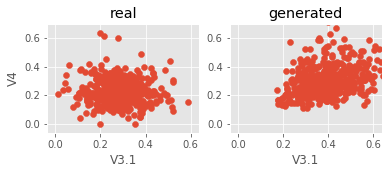

Step: 1000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7545, 0.7102, 0.6897, 0.9573
D Real - D Gen: -0.0204


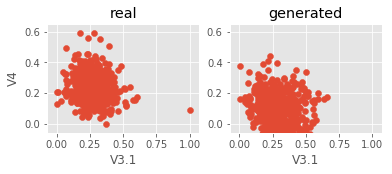

Step: 1100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7385, 0.7183, 0.7181, 0.9614
D Real - D Gen: -0.0002


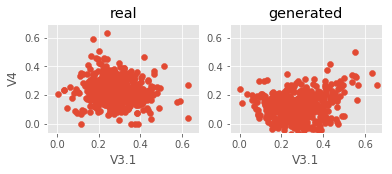

Step: 1200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8330, 0.6769, 0.7932, 0.9614
D Real - D Gen: 0.1163


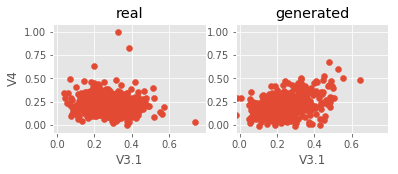

Step: 1300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.9026, 0.5905, 0.8030, 0.9776
D Real - D Gen: 0.2126


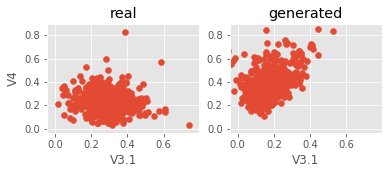

Step: 1400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8492, 0.6238, 0.7964, 0.9309
D Real - D Gen: 0.1726


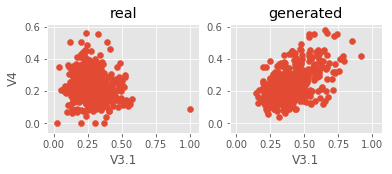

Step: 1500 of 5001.
Losses: G, D Gen, D Real, Xgb: 1.0228, 0.5404, 0.8170, 0.9756
D Real - D Gen: 0.2766


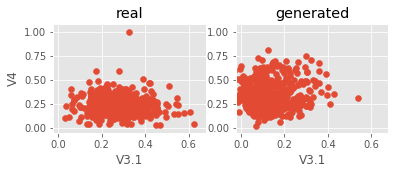

Step: 1600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8525, 0.6501, 0.7738, 0.9858
D Real - D Gen: 0.1237


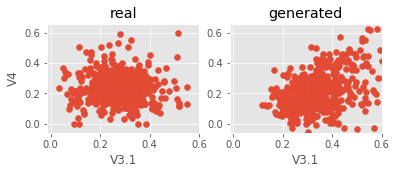

Step: 1700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7466, 0.7501, 0.6770, 0.9695
D Real - D Gen: -0.0732


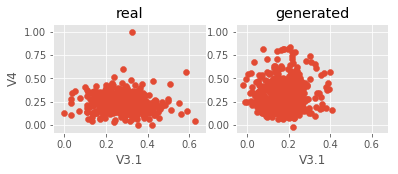

Step: 1800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7508, 0.6911, 0.7017, 0.9492
D Real - D Gen: 0.0106


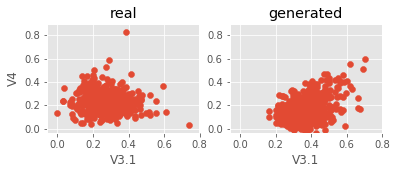

Step: 1900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7945, 0.6741, 0.7045, 0.9512
D Real - D Gen: 0.0305


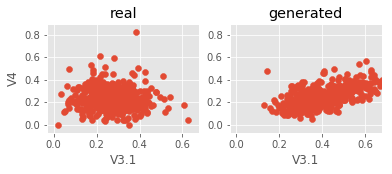

Step: 2000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.9287, 0.5794, 0.7545, 0.9878
D Real - D Gen: 0.1750


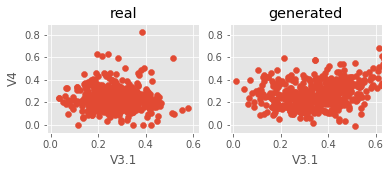

Step: 2100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8252, 0.6337, 0.6719, 0.9776
D Real - D Gen: 0.0382


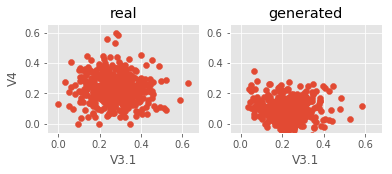

Step: 2200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6805, 0.7924, 0.6359, 0.9715
D Real - D Gen: -0.1565


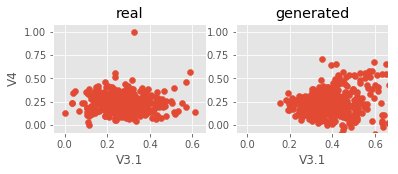

Step: 2300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6926, 0.8704, 0.6373, 0.9797
D Real - D Gen: -0.2330


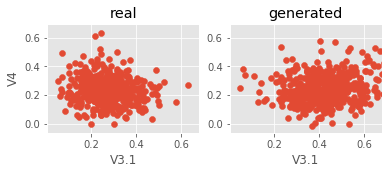

Step: 2400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7662, 0.7700, 0.8104, 0.9776
D Real - D Gen: 0.0404


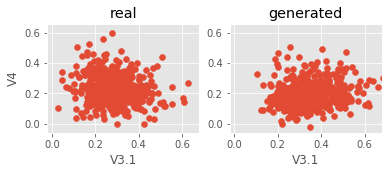

Step: 2500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7518, 0.7468, 0.6982, 0.9715
D Real - D Gen: -0.0486


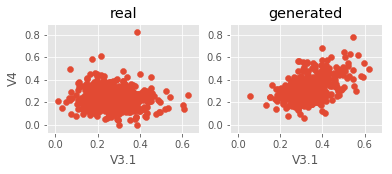

Step: 2600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8282, 0.6481, 0.7411, 0.9675
D Real - D Gen: 0.0930


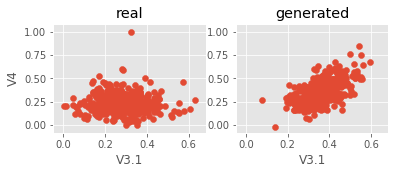

Step: 2700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6763, 0.8609, 0.6577, 0.9837
D Real - D Gen: -0.2032


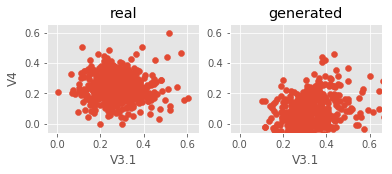

Step: 2800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8016, 0.6589, 0.8308, 0.9817
D Real - D Gen: 0.1719


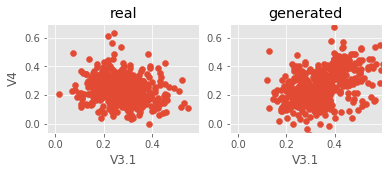

Step: 2900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7685, 0.6719, 0.7002, 0.9573
D Real - D Gen: 0.0283


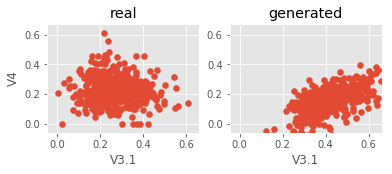

Step: 3000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7549, 0.6918, 0.6738, 0.9512
D Real - D Gen: -0.0180


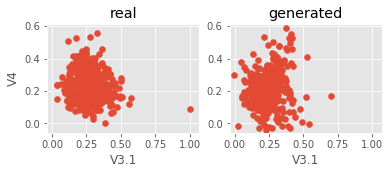

Step: 3100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7368, 0.6901, 0.7123, 0.9350
D Real - D Gen: 0.0222


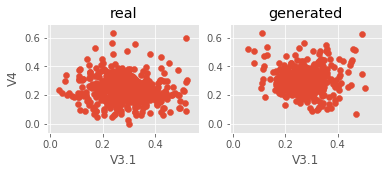

Step: 3200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8258, 0.6197, 0.7759, 0.9736
D Real - D Gen: 0.1562


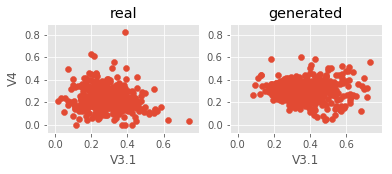

Step: 3300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7487, 0.7232, 0.6166, 0.9736
D Real - D Gen: -0.1066


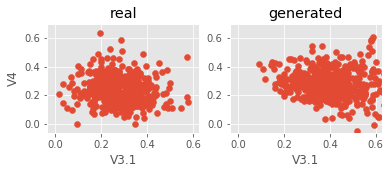

Step: 3400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7577, 0.6876, 0.6879, 0.9472
D Real - D Gen: 0.0002


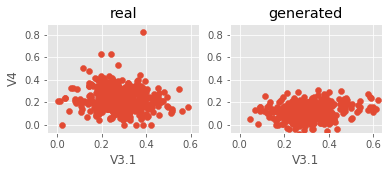

Step: 3500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8108, 0.6459, 0.7031, 0.9634
D Real - D Gen: 0.0572


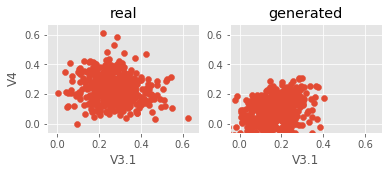

Step: 3600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7387, 0.7058, 0.6602, 0.9654
D Real - D Gen: -0.0456


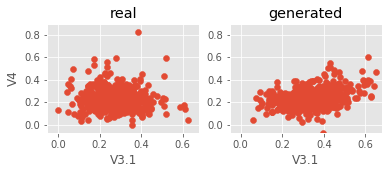

Step: 3700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7309, 0.6913, 0.6960, 0.9187
D Real - D Gen: 0.0047


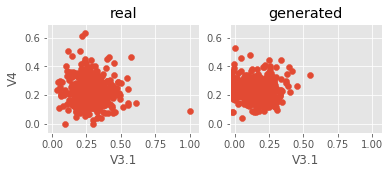

Step: 3800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7490, 0.7159, 0.7390, 0.9695
D Real - D Gen: 0.0231


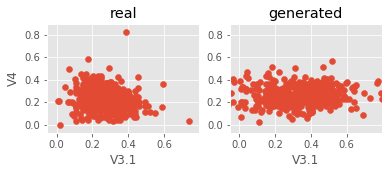

Step: 3900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7305, 0.7242, 0.7019, 0.9309
D Real - D Gen: -0.0223


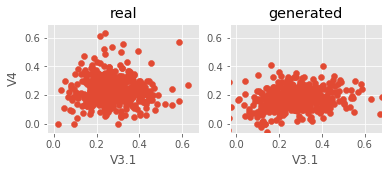

Step: 4000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7716, 0.6755, 0.7076, 0.9675
D Real - D Gen: 0.0320


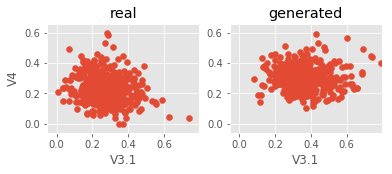

Step: 4100 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.9099, 0.6026, 0.7220, 0.9776
D Real - D Gen: 0.1195


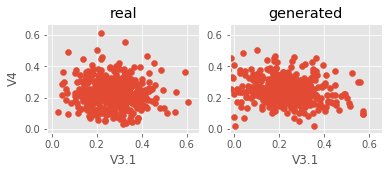

Step: 4200 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8643, 0.6365, 0.7905, 0.9593
D Real - D Gen: 0.1540


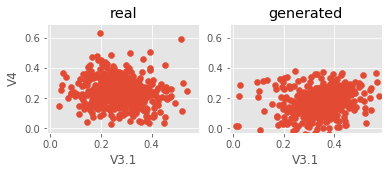

Step: 4300 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.6998, 0.7440, 0.7161, 0.9492
D Real - D Gen: -0.0279


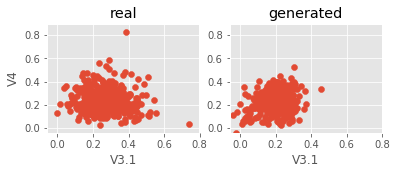

Step: 4400 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7205, 0.7506, 0.7057, 0.9472
D Real - D Gen: -0.0449


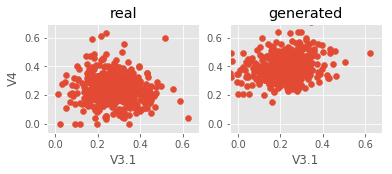

Step: 4500 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8111, 0.6554, 0.7339, 0.9573
D Real - D Gen: 0.0785


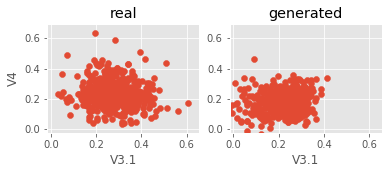

Step: 4600 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7582, 0.6936, 0.7225, 0.9817
D Real - D Gen: 0.0288


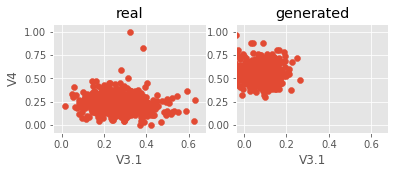

Step: 4700 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8010, 0.6756, 0.6931, 0.9370
D Real - D Gen: 0.0176


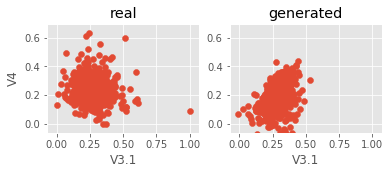

Step: 4800 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7978, 0.6667, 0.7346, 0.9573
D Real - D Gen: 0.0679


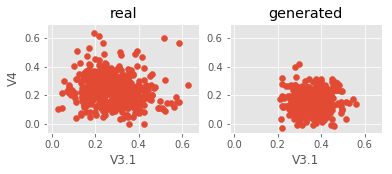

Step: 4900 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.8284, 0.6711, 0.6612, 0.9736
D Real - D Gen: -0.0099


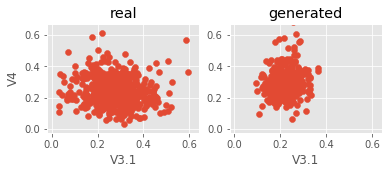

Step: 5000 of 5001.
Losses: G, D Gen, D Real, Xgb: 0.7797, 0.6872, 0.7189, 0.9370
D Real - D Gen: 0.0317


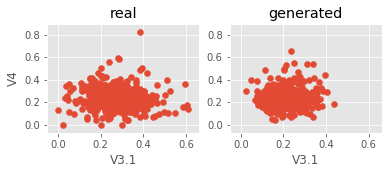

In [4]:
#training dataset 2
train18 = pd.read_csv('train22.csv',index_col=0)
import xgboost
import pickle
import pandas as pd
import numpy as np
train = train18
train.rename(columns={'solubility': 'class'}, inplace=True)
data = train
#label_cols = ['class']
#data_cols = list(data.columns[ data.columns != 'class' ])
data_cols = list(data.columns)

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

rand_dim = 21 # 21 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 5000 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = '/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN files'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

train_no_label = train[ data_cols ]

# Training the vanilla GAN and CGAN architectures

k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN

In [5]:
#save results each 100 iterations
train=train18
seed = 18
data_dim = 21
np.random.seed(seed)
generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
for i in range(1, 51):
    generator_model.load_weights('/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN filesGAN_generator_model_weights_step_'+str(i)+'00.h5')
    test_size = 2364
    x = get_data_batch(train, test_size, seed=0)
    z = np.random.normal(size=(test_size, rand_dim))

    g_z = generator_model.predict(z)

    GAN_0320 = pd.DataFrame(data=g_z)
    train1=train.as_matrix(columns=None)
    train2=GAN_0320.as_matrix(columns=None)
    answer=np.vstack((train1,train2))
    result=pd.DataFrame(data=answer)
    result.to_csv('GAN_'+str(i)+'00_0408_1.csv') 

data_dim:  21
data_cols:  ['V3.1', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'class']
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 21)                0         
_________________________________________________________________
dense_97 (Dense)             (None, 128)               2816      
_________________________________________________________________
dense_98 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_99 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_100 (Dense)            (None, 21)                10773     
Total params: 178,197
Trainable params: 178,197
Non-trainable params: 0
_______________________________

/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


_________________________________________________________________
dense_103 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 129       
Total params: 351,234
Trainable params: 175,617
Non-trainable params: 175,617
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 21)                0         
_________________________________________________________________
generator (Model)            (None, 21)                178197    
_________________________________________________________________
discriminator (Model)        (None, 1)                 175617    
Total params: 353,814
Trainable params: 178,197
Non-trainable params: 175,617
_______________________________________________

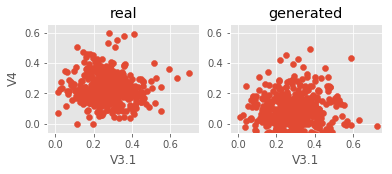

Step: 100 of 101.
Losses: G, D Gen, D Real, Xgb: 0.6906, 0.7882, 0.6727, 0.9878
D Real - D Gen: -0.1155


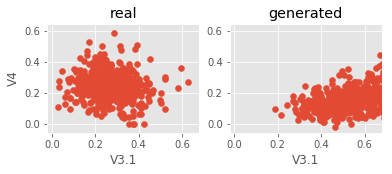

In [22]:
#training dataset 3
train18 = pd.read_csv('train23.csv',index_col=0)
import xgboost
import pickle
import pandas as pd
import numpy as np
train = train18
train.rename(columns={'solubility': 'class'}, inplace=True)
data = train
#label_cols = ['class']
#data_cols = list(data.columns[ data.columns != 'class' ])
data_cols = list(data.columns)

import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *

rand_dim = 21 # 21 # needs to be ~data_dim
base_n_count = 128 # 128

nb_steps = 100 + 1 # 50000 # Add one for logging of the last interval
batch_size = 128 # 64

k_d = 1  # number of critic network updates per adversarial training step
k_g = 1  # number of generator network updates per adversarial training step
critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
learning_rate = 5e-4 # 5e-5
data_dir = '/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN files'
generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

# show = False
show = True 

train_no_label = train[ data_cols ]

# Training the vanilla GAN and CGAN architectures

k_d = 1  # number of critic network updates per adversarial training step
learning_rate = 5e-4 # 5e-5
arguments = [rand_dim, nb_steps, batch_size, 
             k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
            data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN

In [ ]:
#save results each 100 iterations
train=train18
seed = 18
data_dim = 21
np.random.seed(seed)
generator_model, discriminator_model, combined_model = define_models_GAN(rand_dim, data_dim, base_n_count)
for i in range(1, 51):
    generator_model.load_weights('/Users/cindy/Dropbox (NUS Zhou Group)/Xi Han/Data mining/GAN filesGAN_generator_model_weights_step_'+str(i)+'00.h5')
    test_size = 2364
    x = get_data_batch(train, test_size, seed=0)
    z = np.random.normal(size=(test_size, rand_dim))

    g_z = generator_model.predict(z)

    GAN_0320 = pd.DataFrame(data=g_z)
    train1=train.as_matrix(columns=None)
    train2=GAN_0320.as_matrix(columns=None)
    answer=np.vstack((train1,train2))
    result=pd.DataFrame(data=answer)
    result.to_csv('GAN_'+str(i)+'00_0408_2.csv') 